In [7]:
from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/code/modules/'
import sys
sys.path.append(module_path)
import numpy as np
from scipy.interpolate import SmoothBivariateSpline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval
import h5py
%matplotlib inline 
#notebook

In [ ]:
x = []
y = []
z = []
grid_length = 10
for i in range(grid_length):
    for j in range(grid_length):
        pi = np.random.rand() - .5
        pj = np.random.rand() - .5
        x.append(i + pi)
        y.append(j + pj)
        z.append(np.sin(i + pi) + np.cos(j + pj))

In [ ]:
fig1 = plt.figure(1, figsize=(10,10))
ax = fig1.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c='r', s=6)
plt.show()

In [ ]:
masses_grid_vals = np.linspace(0, 1, num=10)
scale_factors_grid_vals = np.linspace(0, 1, num=10)
masses_grid_vals, scale_factors_grid_vals = np.meshgrid(masses_grid_vals, scale_factors_grid_vals)
shape_before = masses_grid_vals.shape
print(masses_grid_vals)
masses_grid_vals = masses_grid_vals.flatten()

masses_grid_vals = np.reshape(masses_grid_vals, shape_before)
print(masses_grid_vals)

In [ ]:
grid_vals = spline.ev(masses_grid_vals, scale_factors_grid_vals)

In [ ]:
spline = SmoothBivariateSpline(x,y,z)

In [ ]:
x_points = []
y_points = []
for i in np.linspace(0, grid_length-1, num=100):
    for j in np.linspace(0, grid_length-1, num=100):
        x_points.append(i)
        y_points.append(j)
z_points = spline.ev(x_points, y_points)

In [ ]:
fig2 = plt.figure(1, figsize=(10,10))
ax = fig2.add_subplot(111, projection='3d')
sc = ax.scatter(x_points, y_points, z_points, c='r', s=6)
plt.show()

### Least squares fit on the smf

In [8]:
filename = '/home/magnus/data/observational_data/all_data.h5'
file = h5py.File(filename, 'r')
# print("Keys: ", list(file.keys()))
universe_0 = file['Universe_0']
# print("Keys: ", list(universe_0.keys()))

In [9]:
# Get the SMF objects from the universe
smf = universe_0['SMF']
#smf?
# List all objects
# print("Keys: ", list(smf.keys()))
# Get the dataset 'Data'
data = smf['Data']
# print("Keys of Data: ", list(data.keys()))
data_keys = list(data.keys())
model = smf['Model']
sets = smf['Sets']
# print(list(sets))
# print(list(data['051 Caputi 2011 (z = 3.50 - 4.25)']))
# print(list(data))
#data?

redshift:  0
stellar_masses:  [ 7.3276086  7.5276084  7.727608   7.7876086  7.9276085  7.9876084
  8.127609   8.187608   8.327609   8.387413   8.387609   8.487412
  8.527609   8.587413   8.587608   8.687413   8.727609   8.787413
  8.787608   8.887413   8.9276085  8.987412   8.987608   9.077609
  9.087413   9.127609   9.1776085  9.187413   9.187608   9.277609
  9.287413   9.327609   9.377609   9.387413   9.387609   9.477609
  9.487412   9.527609   9.577609   9.587413   9.587608   9.6776085
  9.687413   9.727609   9.777609   9.787413   9.787608   9.877609
  9.887413   9.9276085  9.977609   9.987412   9.987608  10.077609
 10.087413  10.127609  10.1776085 10.187413  10.187608  10.277609
 10.287413  10.327609  10.377609  10.387413  10.387609  10.477609
 10.487412  10.527609  10.577609  10.587413  10.587608  10.6776085
 10.687413  10.727609  10.777609  10.787413  10.787608  10.877609
 10.887413  10.9276085 10.977609  10.987412  10.987608  11.077609
 11.087413  11.127609  11.1776085 11.187413

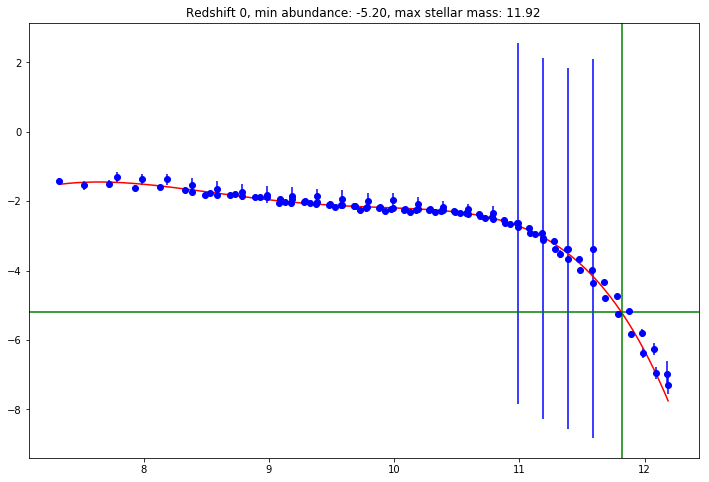

redshift:  0.1
stellar_masses:  [ 7.2876086  7.7176085  7.7876086  7.9876084  8.147609   8.187608
  8.387413   8.387609   8.487412   8.577609   8.587413   8.587608
  8.687413   8.787413   8.787608   8.887413   8.987412   8.987608
  9.007608   9.077609   9.087413   9.1776085  9.187413   9.187608
  9.277609   9.287413   9.377609   9.387413   9.387609   9.437609
  9.477609   9.487412   9.577609   9.587413   9.587608   9.6776085
  9.687413   9.777609   9.787413   9.787608   9.867609   9.877609
  9.887413   9.977609   9.987412   9.987608  10.077609  10.087413
 10.1776085 10.187413  10.187608  10.277609  10.287413  10.297609
 10.377609  10.387413  10.387609  10.477609  10.487412  10.577609
 10.587413  10.587608  10.6776085 10.687413  10.727609  10.777609
 10.787413  10.787608  10.877609  10.887413  10.977609  10.987412
 10.987608  11.077609  11.087413  11.157609  11.1776085 11.187413
 11.187608  11.277609  11.287413  11.377609  11.387413  11.387609
 11.477609  11.487412  11.577609  11.587413

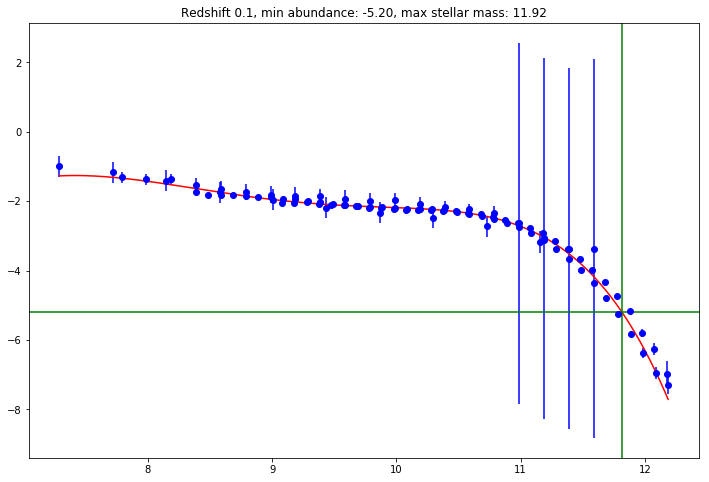

redshift:  0.2
stellar_masses:  [ 7.2876086  7.7176085  7.7876086  7.9876084  8.147609   8.187608
  8.387413   8.387609   8.487412   8.527609   8.577609   8.587413
  8.587608   8.687413   8.787413   8.787608   8.817609   8.887413
  8.987412   8.987608   9.007608   9.077609   9.087413   9.107609
  9.1776085  9.187413   9.187608   9.277609   9.287413   9.377609
  9.387413   9.387609   9.397609   9.437609   9.477609   9.487412
  9.577609   9.587413   9.587608   9.6776085  9.687413   9.687609
  9.777609   9.787413   9.787608   9.867609   9.877609   9.887413
  9.977609   9.977609   9.987412   9.987608  10.077609  10.087413
 10.1776085 10.187413  10.187608  10.267609  10.277609  10.287413
 10.297609  10.377609  10.387413  10.387609  10.477609  10.487412
 10.557609  10.577609  10.587413  10.587608  10.6776085 10.687413
 10.727609  10.777609  10.787413  10.787608  10.847609  10.877609
 10.887413  10.977609  10.987412  10.987608  11.077609  11.087413
 11.137609  11.157609  11.1776085 11.187413 

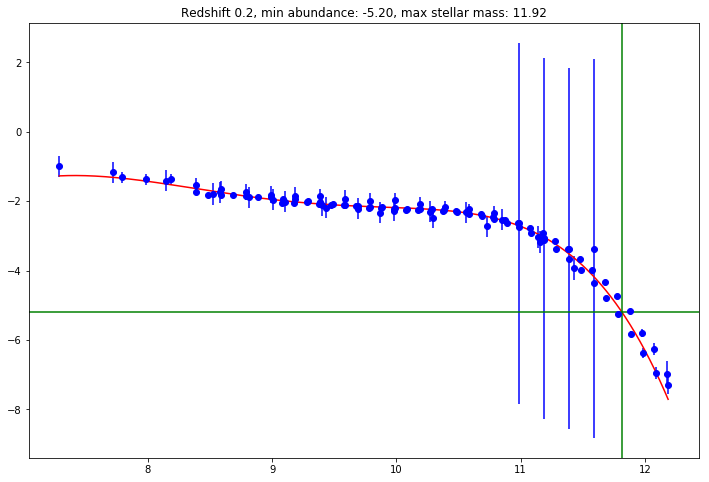

redshift:  0.5
stellar_masses:  [ 8.102609   8.387609   8.397608   8.497608   8.537608   8.587608
  8.597609   8.672609   8.697608   8.787608   8.787608   8.797608
  8.827609   8.897608   8.897608   8.957609   8.987608   8.997608
  8.997608   9.037608   9.077609   9.097609   9.097609   9.187608
  9.197608   9.197608   9.242609   9.287608   9.297608   9.297608
  9.317609   9.327609   9.387609   9.397608   9.397608   9.497608
  9.497608   9.527609   9.537608   9.577609   9.587608   9.597609
  9.597609   9.602609   9.627609   9.697608   9.697608   9.727609
  9.727609   9.787608   9.787608   9.797608   9.797608   9.812609
  9.827609   9.827609   9.887609   9.897608   9.897608   9.9276085
  9.987608   9.997608   9.997608  10.007608  10.027609  10.027609
 10.037608  10.077609  10.097609  10.097609  10.097609  10.127609
 10.127609  10.172609  10.187608  10.197608  10.197608  10.227609
 10.227609  10.287608  10.287609  10.297608  10.297608  10.327609
 10.327609  10.327609  10.382608  10.387609

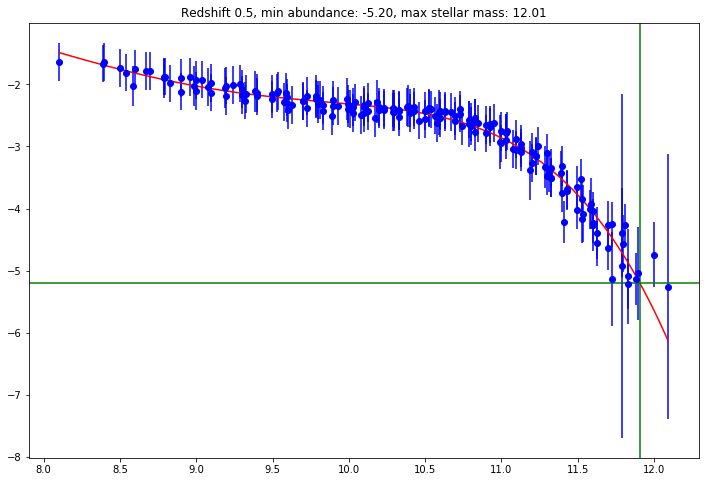

redshift:  1
stellar_masses:  [ 8.017608   8.217608   8.387609   8.417608   8.537608   8.617608
  8.637609   8.647608   8.787608   8.817608   8.847609   8.887609
  8.897608   8.997608   9.017608   9.037608   9.047608   9.097609
  9.137609   9.187608   9.197608   9.217608   9.247608   9.277609
  9.287608   9.287608   9.297608   9.387609   9.387609   9.387609
  9.397608   9.417608   9.447608   9.497608   9.497608   9.527609
  9.537608   9.537608   9.587608   9.587608   9.597609   9.597609
  9.617608   9.637609   9.647608   9.697608   9.697608   9.707609
  9.777609   9.787608   9.787608   9.787608   9.787608   9.797608
  9.797608   9.817608   9.847609   9.887609   9.897608   9.897608
  9.917609   9.9276085  9.987608   9.987608   9.997608   9.997608
 10.017608  10.027609  10.037608  10.037608  10.047608  10.097609
 10.097609  10.097609  10.137609  10.147609  10.187608  10.187608
 10.197608  10.197608  10.217608  10.247608  10.277609  10.277609
 10.287608  10.287608  10.297608  10.297608  1

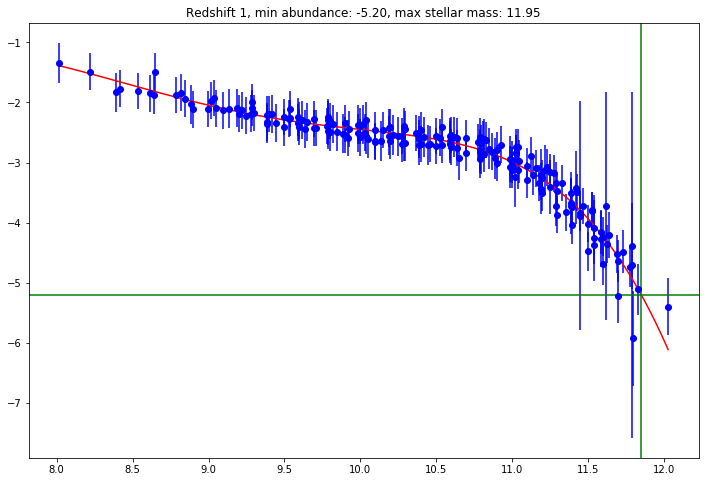

In [20]:
# Go through all of the data sets, store only data points within the redshifts the network has been trained to predict
predicted_redshifts = [0,.1,.2,.5,1]#,2,3,4,6,8]
bin_width = 0.2
box_size = 200
min_count = 10
degree = 6
n_points = 1000

min_abundance = np.log10(min_count / box_size**3 / bin_width)

max_masses = []

for redshift in predicted_redshifts:
    stellar_masses = []
    abundances = []
    errors = []

    for i_key, key in enumerate(list(data)):
        min_redshift = list(sets)[i_key][2]
        max_redshift = list(sets)[i_key][3]
        if redshift >= min_redshift and redshift <= max_redshift:
            stellar_masses.extend([list(point)[0] for point in list(data[key])])
            abundances.extend([list(point)[1] for point in list(data[key])])
            errors.extend([list(point)[2] for point in list(data[key])])

    weights = 1 / np.array(errors)
    x = np.linspace(np.min(stellar_masses), np.max(stellar_masses), n_points) # contains masses
    p3 = np.polyfit(stellar_masses, abundances, degree, w=weights)
    max_mass_ind = np.argmin(np.absolute(polyval(x, np.flip(p3, axis=0)) - min_abundance))
    max_mass = x[max_mass_ind] + bin_width/2
    max_masses.append(max_mass)
    
    sorted_inds = np.argsort(stellar_masses)
    
    print('redshift: ', redshift)
    print('stellar_masses: ', np.array(stellar_masses)[sorted_inds])
    print('abundances: ', np.array(abundances)[sorted_inds])
    print('errors: ', np.array(errors)[sorted_inds])
    print('max_mass: ', max_mass)
    
    fig = plt.figure(figsize=(12,8))
    plt.errorbar(stellar_masses, abundances, yerr=errors, fmt = 'bo')
    plt.plot(x, polyval(x, np.flip(p3, axis=0)), 'r-')
    plt.axvline(x=x[max_mass_ind], color='green')
    plt.axhline(y=min_abundance, color='green')
    plt.title('Redshift {}, min abundance: {:.2f}, max stellar mass: {:.2f}'.format(redshift, min_abundance,
                                                                                    max_mass))
    plt.show()

# for predicted_redshift in predicted_redshifts:
#     observable_data = {
#         'stellar_masses': [],
#         'abundances': [],
#         'errors': []
#     }

#     for i_key, key in enumerate(list(data)):
#         min_redshift = list(sets)[i_key][2]
#         max_redshift = list(sets)[i_key][3]
#         if predicted_redshift >= min_redshift and predicted_redshift <= max_redshift:
#             observable_data['stellar_masses'].extend([list(point)[0] for point in list(data[key])])
#             observable_data['abundances'].extend([list(point)[1] for point in list(data[key])])
#             observable_data['errors'].extend([list(point)[2] for point in list(data[key])])

    # print(observable_data['stellar_masses'])
    # print(observable_data['abundances'])
    # print(observable_data['errors'])

    # print(len(observable_data['stellar_masses']))
    # print(len(observable_data['abundances']))
    # print(len(observable_data['errors']))

#     weights = 1 / np.array(observable_data['errors'])
#     x = np.linspace(np.min(observable_data['stellar_masses']), np.max(observable_data['stellar_masses']), n_points)
#     p3 = np.polyfit(observable_data['stellar_masses'], observable_data['abundances'], degree, w=weights)
    # find where it reaches the minimum abundance
    # p_find = np.polyfit(observable_data['stellar_masses'], np.array(observable_data['abundances']) - min_abundance, degree, w=weights)
    # p_find_2 = np.poly1d(p_find)
    # p_find_2.r
#     max_mass_ind = np.argmin(np.absolute(polyval(x, np.flip(p3, axis=0)) - min_abundance))
   
#     fig = plt.figure(figsize=(12,8))
#     plt.errorbar(observable_data['stellar_masses'], observable_data['abundances'], yerr=observable_data['errors'], fmt = 'bo')
#     plt.plot(x, polyval(x, np.flip(p3, axis=0)), 'r-')
#     plt.axvline(x=x[max_mass_ind], color='green')
#     plt.axhline(y=min_abundance, color='green')
#     plt.title('Redshift {}, min abundance: {:.2f}, max stellar mass: {:.2f}'.format(predicted_redshift, min_abundance,
#                                                                                     x[max_mass_ind]))
#     plt.show()

In [37]:
a = (-float('inf'))
a

-inf

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pickle

x = np.linspace(0,5)
y = np.linspace(10,20)
x,y = np.meshgrid(x,y)
z = np.sqrt(x + y)
z = np.sin(z)


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=.7, aspect=10)
# ax.legend()
plt.show()

pickle.dump(fig, open('sinus.pickle','wb'))


In [ ]:
%matplotlib notebook
# Load figure from disk and display
fig_handle = pickle.load(open('sinus.pickle','rb'))
fig_handle.show()
# fig_handle.axes[0]